<a href="https://colab.research.google.com/github/pantaleonvqz/DS_C3_SC1_Jose_Luis_Vazquez/blob/main/DS_C3_SC1_Jose_Luis_Vazquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.- Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.

2.- Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table as pd_table
happiness = pd.read_csv('Happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.- A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [5]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico = mexico.set_index('Country or region')
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.- Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(0.5, 1.0, 'World Happiness Report')

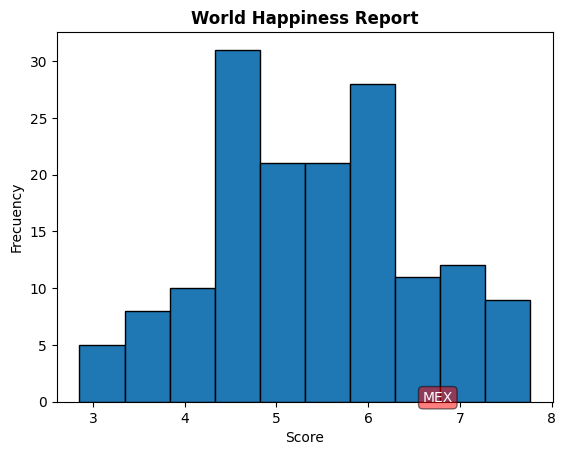

In [23]:
props_bbox = {
    'boxstyle': 'round',
    'facecolor': 'Red',
    'alpha': 0.5
}

val = float(mexico.iloc[0]['Score'])
plt.hist(happiness['Score'],edgecolor='black')
plt.text(val,0,'MEX', color = 'white', bbox = props_bbox)
plt.xlabel('Score')
plt.ylabel('Frecuency')
plt.title('World Happiness Report',fontweight='bold')

5.- Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(0.5, 0, 'Healthy life expectancy')

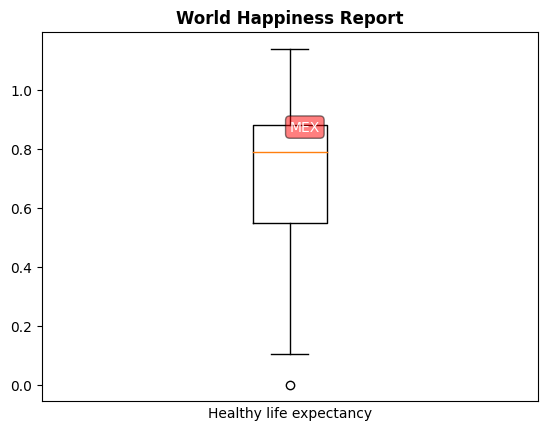

In [24]:
props_bbox = {
    'boxstyle': 'round',
    'facecolor': 'Red',
    'alpha': 0.5
}

val = float(mexico.iloc[0]['Healthy life expectancy'])
plt.text(1,val,'MEX', color = 'white', bbox = props_bbox)
plt.boxplot(happiness['Healthy life expectancy'])
plt.title('World Happiness Report',fontweight='bold')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Healthy life expectancy')

6.- Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

Text(0.5, 1.0, 'Contribution in Mexico happiness score')

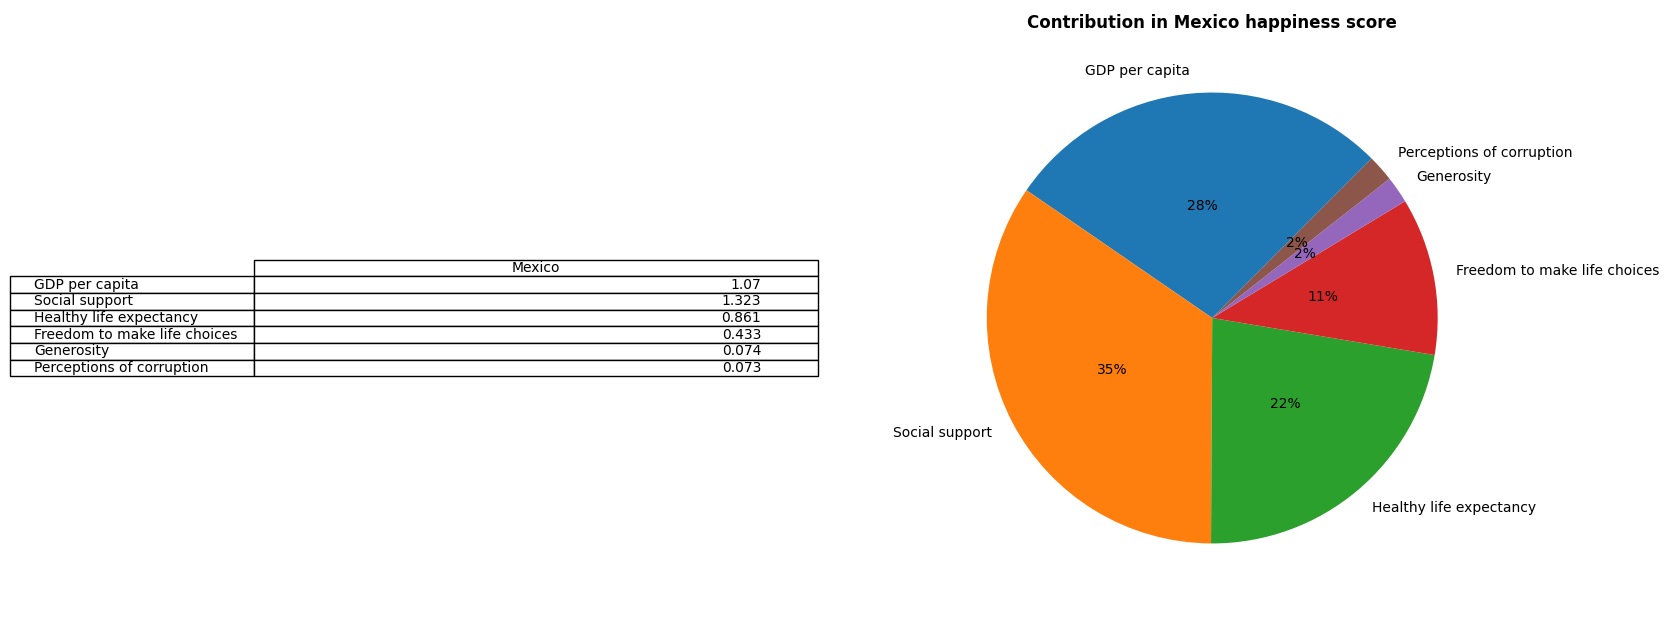

In [13]:
mexchart = mexico.loc[:,'GDP per capita':'Perceptions of corruption']
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
plt.axis('off')
tbl = pd_table(ax1, mexchart.T, loc='center')
ax2 = plt.subplot(122)
ax2.pie(mexchart.loc['Mexico'], autopct='%1.0f%%',startangle=45, shadow=False, labels=mexchart.columns,pctdistance=0.5)
plt.title('Contribution in Mexico happiness score', fontweight = "bold")

7.- Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<Axes: title={'center': 'World Happiness Report'}>

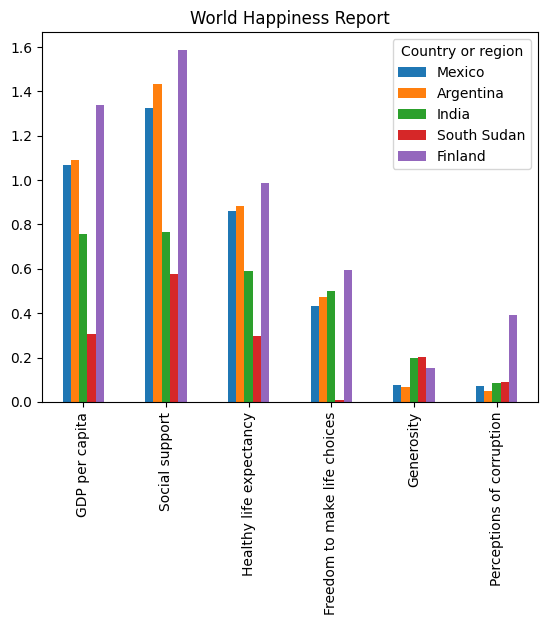

In [15]:
minIdx = happiness["Score"].idxmin()
maxIdx = happiness["Score"].idxmax()
filtro = happiness[(happiness['Country or region'] == 'Mexico') |
                     (happiness['Country or region'] == 'Argentina') |
                     (happiness['Country or region'] == 'India')].index.to_list()
filtro.append(minIdx)
filtro.append(maxIdx)
filtropais = happiness.loc[filtro]
filtropais = filtropais[['Country or region','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
filtropais.set_index('Country or region', inplace = True)
filtropais.T.plot(kind='bar', title = 'World Happiness Report')

8.- Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

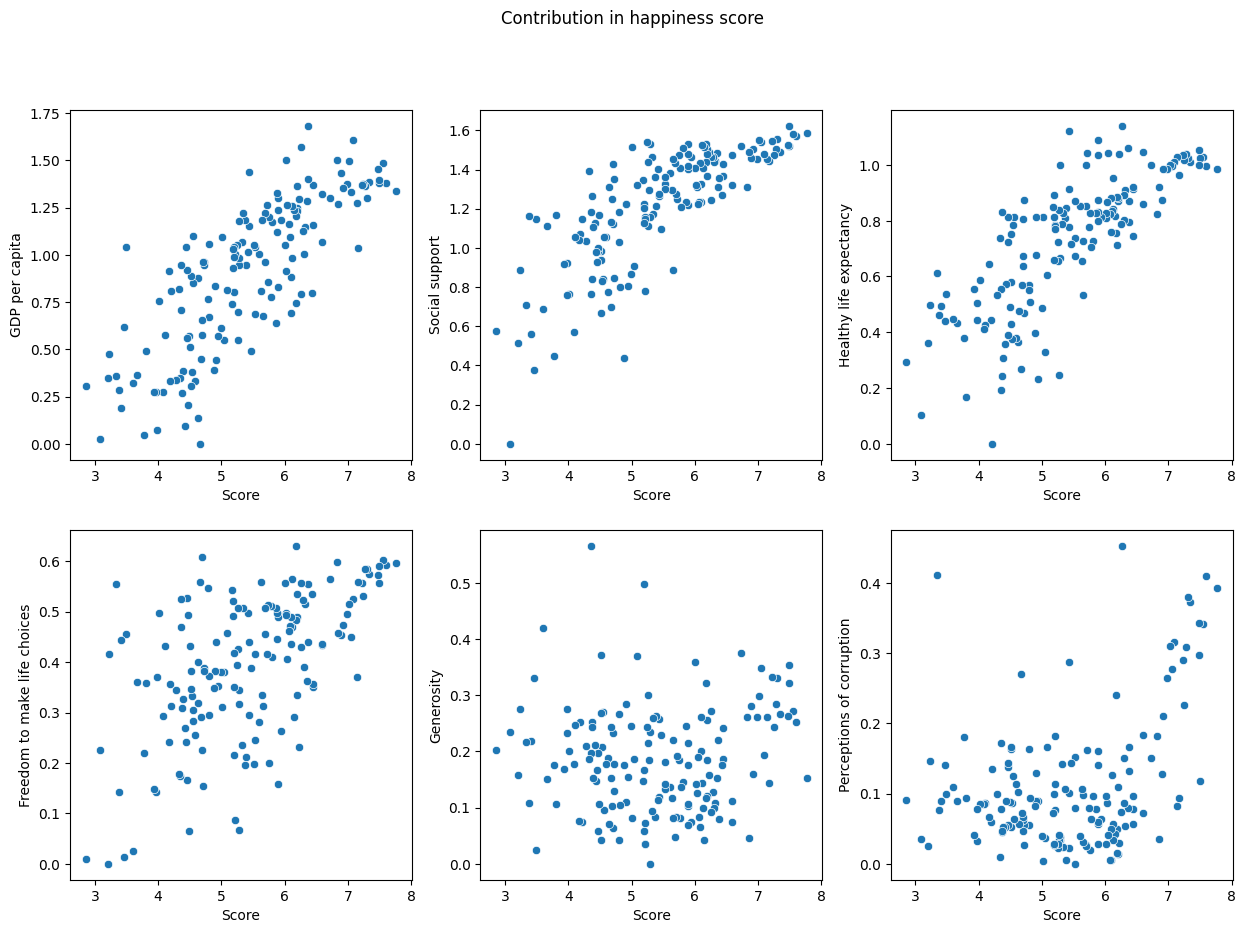

In [16]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Contribution in happiness score')
variables = happiness.columns.to_list()
variables.remove('Overall rank')
variables.remove('Country or region')
variables.remove('Score')
for i in range(1,(len(variables)+1)):
  ax = fig.add_subplot(int('23'+str(i)))
  sns.scatterplot(data=happiness, x="Score", y=variables[i-1], ax=ax)

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<Axes: >

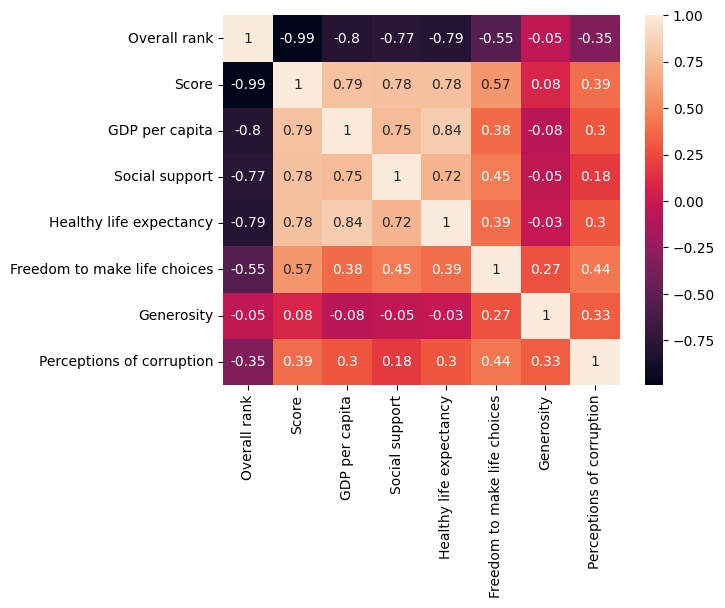

In [17]:
variables = happiness.columns.to_list()
variables.remove('Country or region')
matCorr = []
for i in range(0,len(variables)):
  matCorr.append([])
  for j in range(0,len(variables)):
    corr = round(happiness[variables[i]].corr(happiness[variables[j]]),2)
    matCorr[i].append(corr)
datosCorr = pd.DataFrame(matCorr, index=variables, columns=variables)
sns.heatmap(datosCorr,annot=True)



9.- Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

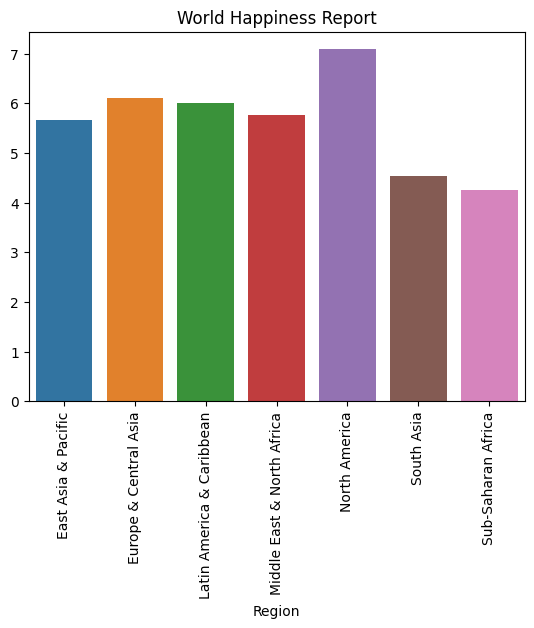

In [19]:
metadata = pd.read_csv('Metadata.csv')
temp = happiness.set_index('Country or region').join(metadata.set_index('TableName'))
temp = temp[['Region', 'Score']].groupby('Region').mean()
sns.barplot(temp.T).set(title = 'World Happiness Report')
plt.xticks(rotation=90)